In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import pandas_profiling as pp

In [2]:
df = pd.read_csv('collegePlace.csv')
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [46]:
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [4]:
df.isna().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [5]:
# as can seen there is no NUll values

# Visualization

In [6]:
df['Gender'].value_counts()

Male      2475
Female     491
Name: Gender, dtype: int64

<AxesSubplot:ylabel='Stream'>

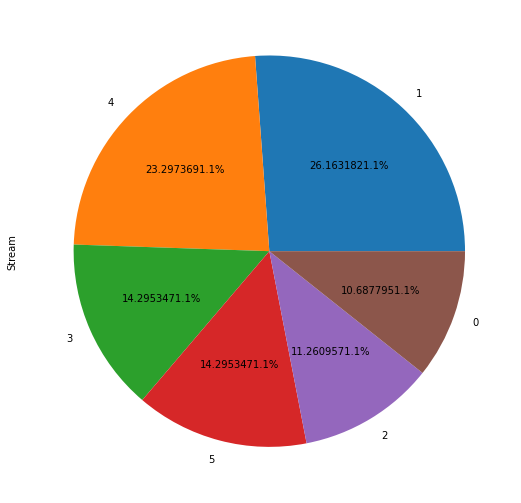

In [64]:
plt.figure(figsize=(9,9))
df['Stream'].value_counts().plot(kind='pie',autopct='%f1.1%%')

In [8]:
#as can seen there is more student of it and cs as compared to other brach


(array([ 531., 1084.,  941.,  195.,  131.,   29.,   50.,    0.,    3.,
           2.]),
 array([19. , 20.1, 21.2, 22.3, 23.4, 24.5, 25.6, 26.7, 27.8, 28.9, 30. ]),
 <BarContainer object of 10 artists>)

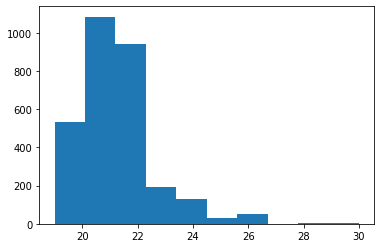

In [9]:
plt.hist(df['Age'])

In [10]:
#Most of the student is under 24 years of age

In [11]:
from sklearn.preprocessing import LabelEncoder #convert object to num(int)
LE=LabelEncoder()
df['Gender']=LE.fit_transform(df['Gender'])
df['Stream']=LE.fit_transform(df['Stream'])

<function matplotlib.pyplot.show(close=None, block=None)>

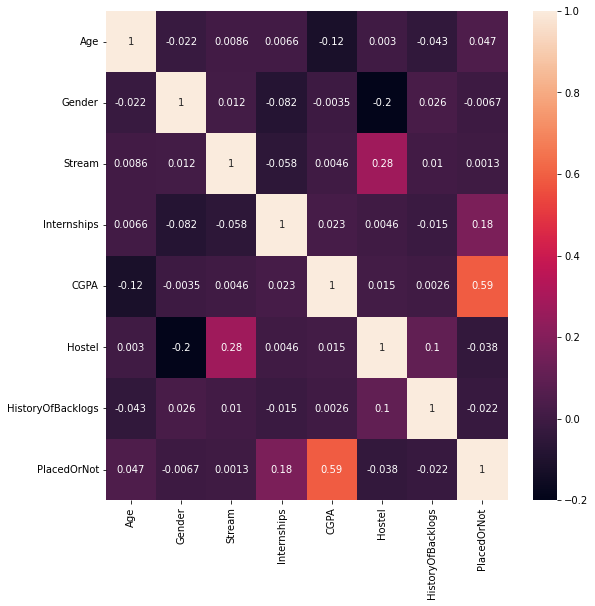

In [12]:
plt.figure(figsize=(9,9))
sns.heatmap(df.corr(),annot=True)
plt.show

In [47]:
#cgpa and internshp isnhighly coreleted with placememt of student

In [48]:
df

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,3,1,8,1,1,1
1,21,0,1,0,7,1,1,1
2,22,0,4,1,6,0,0,1
3,21,1,4,0,8,0,1,1
4,22,1,5,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,1,4,0,7,0,0,0
2962,23,1,5,1,7,1,0,0
2963,22,1,4,1,7,0,0,0
2964,22,1,1,1,7,0,0,0


In [14]:
df['PlacedOrNot'].value_counts()

1    1639
0    1327
Name: PlacedOrNot, dtype: int64

In [15]:
x=df.iloc[:,:-1]
y=df['PlacedOrNot'] #split x&y

In [16]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)

In [17]:

#build the models

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report,accuracy_score

In [19]:
lr=LogisticRegression()
sv=SVC()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
BC=BaggingClassifier()
RF=RandomForestClassifier()


In [20]:
def random(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    print(classification_report(ytest,ypred))
    

In [21]:
random(lr)

              precision    recall  f1-score   support

           0       0.75      0.71      0.73       330
           1       0.78      0.81      0.79       412

    accuracy                           0.76       742
   macro avg       0.76      0.76      0.76       742
weighted avg       0.76      0.76      0.76       742



In [22]:
random(sv)

              precision    recall  f1-score   support

           0       0.74      0.74      0.74       330
           1       0.79      0.79      0.79       412

    accuracy                           0.77       742
   macro avg       0.76      0.76      0.76       742
weighted avg       0.77      0.77      0.77       742



In [23]:
random(knn)

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       330
           1       0.90      0.84      0.87       412

    accuracy                           0.86       742
   macro avg       0.86      0.86      0.86       742
weighted avg       0.86      0.86      0.86       742



In [24]:
random(dt)

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       330
           1       0.92      0.84      0.87       412

    accuracy                           0.87       742
   macro avg       0.87      0.87      0.87       742
weighted avg       0.87      0.87      0.87       742



In [25]:
random(BC)

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       330
           1       0.93      0.84      0.89       412

    accuracy                           0.88       742
   macro avg       0.88      0.88      0.88       742
weighted avg       0.88      0.88      0.88       742



In [26]:
random(RF)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       330
           1       0.91      0.85      0.88       412

    accuracy                           0.87       742
   macro avg       0.87      0.87      0.87       742
weighted avg       0.87      0.87      0.87       742



In [27]:
# we get max accuracy in decision tree algorithm

In [28]:
#we can check by appying some prunimg tech
dt.score(xtrain, ytrain)

0.9262589928057554

In [29]:
dt.score(xtest, ytest)

0.866576819407008

In [30]:
#here traing error is less and testing error is high mean overfit

In [31]:
#use hypertuner max_depth

In [32]:
dt1 = DecisionTreeClassifier(max_depth=10)
random(dt1)

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       330
           1       0.95      0.83      0.89       412

    accuracy                           0.88       742
   macro avg       0.88      0.89      0.88       742
weighted avg       0.89      0.88      0.88       742



In [33]:
for i in range(1,50):
    dt2 = DecisionTreeClassifier(max_depth=i)
    dt2.fit(xtrain, ytrain)
    ypred = dt2.predict(xtest)
    print(f" {i} -: {accuracy_score(ytest, ypred)}")

 1 -: 0.8126684636118598
 2 -: 0.8517520215633423
 3 -: 0.871967654986523
 4 -: 0.8706199460916442
 5 -: 0.8814016172506739
 6 -: 0.8827493261455526
 7 -: 0.8787061994609164
 8 -: 0.8773584905660378
 9 -: 0.8706199460916442
 10 -: 0.8827493261455526
 11 -: 0.8773584905660378
 12 -: 0.871967654986523
 13 -: 0.8692722371967655
 14 -: 0.866576819407008
 15 -: 0.866576819407008
 16 -: 0.866576819407008
 17 -: 0.866576819407008
 18 -: 0.866576819407008
 19 -: 0.866576819407008
 20 -: 0.866576819407008
 21 -: 0.866576819407008
 22 -: 0.866576819407008
 23 -: 0.866576819407008
 24 -: 0.866576819407008
 25 -: 0.866576819407008
 26 -: 0.866576819407008
 27 -: 0.866576819407008
 28 -: 0.866576819407008
 29 -: 0.866576819407008
 30 -: 0.866576819407008
 31 -: 0.866576819407008
 32 -: 0.866576819407008
 33 -: 0.866576819407008
 34 -: 0.866576819407008
 35 -: 0.866576819407008
 36 -: 0.866576819407008
 37 -: 0.866576819407008
 38 -: 0.866576819407008
 39 -: 0.866576819407008
 40 -: 0.86657681940700

In [34]:
dt2 = DecisionTreeClassifier(max_depth=6)
random(dt2)    #here after aplyinmg prunning tech we can increse accuracy from 87 to 88

              precision    recall  f1-score   support

           0       0.80      0.98      0.88       330
           1       0.98      0.80      0.88       412

    accuracy                           0.88       742
   macro avg       0.89      0.89      0.88       742
weighted avg       0.90      0.88      0.88       742



In [35]:
#hypyertuner min_sample_leaf

In [36]:
dt3= DecisionTreeClassifier(min_samples_leaf=10)
random(dt3)

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       330
           1       0.95      0.83      0.89       412

    accuracy                           0.88       742
   macro avg       0.88      0.89      0.88       742
weighted avg       0.89      0.88      0.88       742



In [37]:
for i in range(1,75):
    dt4 = DecisionTreeClassifier(min_samples_leaf=i)
    dt4.fit(xtrain, ytrain)
    ypred = dt4.predict(xtest)
    print(f" {i} -: {accuracy_score(ytest, ypred)}")

 1 -: 0.866576819407008
 2 -: 0.8733153638814016
 3 -: 0.876010781671159
 4 -: 0.8746630727762803
 5 -: 0.871967654986523
 6 -: 0.8733153638814016
 7 -: 0.8746630727762803
 8 -: 0.8746630727762803
 9 -: 0.8746630727762803
 10 -: 0.8827493261455526
 11 -: 0.8840970350404312
 12 -: 0.8840970350404312
 13 -: 0.8827493261455526
 14 -: 0.8800539083557951
 15 -: 0.8827493261455526
 16 -: 0.8827493261455526
 17 -: 0.8827493261455526
 18 -: 0.8827493261455526
 19 -: 0.8827493261455526
 20 -: 0.8827493261455526
 21 -: 0.8840970350404312
 22 -: 0.8840970350404312
 23 -: 0.8840970350404312
 24 -: 0.8867924528301887
 25 -: 0.8867924528301887
 26 -: 0.8827493261455526
 27 -: 0.8840970350404312
 28 -: 0.8840970350404312
 29 -: 0.8840970350404312
 30 -: 0.8840970350404312
 31 -: 0.8840970350404312
 32 -: 0.8840970350404312
 33 -: 0.8840970350404312
 34 -: 0.8840970350404312
 35 -: 0.8840970350404312
 36 -: 0.8840970350404312
 37 -: 0.8840970350404312
 38 -: 0.8800539083557951
 39 -: 0.880053908355795

In [38]:
dt5 = DecisionTreeClassifier(min_samples_leaf=12)
random(dt5)

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       330
           1       0.95      0.83      0.89       412

    accuracy                           0.88       742
   macro avg       0.89      0.89      0.88       742
weighted avg       0.89      0.88      0.88       742



In [39]:
dt6 = DecisionTreeClassifier(criterion='gini',min_samples_leaf=12)
random(dt6)

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       330
           1       0.95      0.83      0.89       412

    accuracy                           0.88       742
   macro avg       0.89      0.89      0.88       742
weighted avg       0.89      0.88      0.88       742



In [40]:
cvs = cross_val_score(dt2, x,y, cv=5, scoring="accuracy")
print(cvs.mean())

0.8725705622838843


In [41]:
cvs2 = cross_val_score(dt6, x,y, cv=5, scoring="accuracy")
print(cvs2.mean())

0.8671771111906018


In [42]:
df

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,3,1,8,1,1,1
1,21,0,1,0,7,1,1,1
2,22,0,4,1,6,0,0,1
3,21,1,4,0,8,0,1,1
4,22,1,5,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,1,4,0,7,0,0,0
2962,23,1,5,1,7,1,0,0
2963,22,1,4,1,7,0,0,0
2964,22,1,1,1,7,0,0,0


In [43]:
Age=int(input('enter age of student'))
Gender=int(input('enter Gender of student: male=1,female=0'))
Stream=int(input('enter Stream of student'))
Internships=int(input('enter Internships no'))
CGPA=int(input('enter CGPA of student'))
Hostel=int(input('enter Hostel of student yes=1,no=0'))
HistoryOfBacklogs=int(input('enter HistoryOfBacklogs of student yes=1,no=0'))


res=dt3.predict([[Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs]])
if res==1:
    print('Studuent placed')
else:
    print('Student Not placed')


enter age of student23
enter Gender of student: male=1,female=01
enter Stream of student1
enter Internships no2
enter CGPA of student9
enter Hostel of student yes=1,no=01
enter HistoryOfBacklogs of student yes=1,no=01
Studuent placed


In [44]:
#by this model we can predict whether a student placed or not 